In [6]:
import pandas as pd
import geopandas
import folium

In [2]:
df = pd.read_excel("meta.xlsx")

geometry = geopandas.points_from_xy(df.lat, df.lon)
geo_df = geopandas.GeoDataFrame(
    df, geometry=geometry
)

geo_df.head()

,city_name,lon,lat,area,density,no_people,geometry
0,biala_podlaska,52.033333,23.116667,49.40,1152.06,56942,POINT (23.11667 52.03333)
1,bialystok,53.135278,23.145556,102.13,2872.90,293413,POINT (23.14556 53.13528)
2,bielsko_biala,49.822500,19.044444,124.51,1351.90,168319,POINT (19.04444 49.82250)
3,bydgoszcz,53.125000,18.011111,175.98,1941.70,337666,POINT (18.01111 53.12500)
4,gdansk,54.347500,18.645278,263.44,1845.00,486022,POINT (18.64528 54.34750)


<AxesSubplot:>

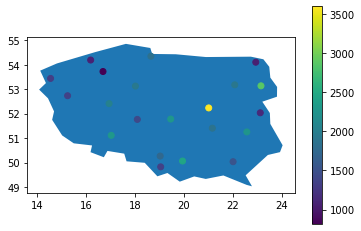

In [4]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.name=='Poland'].plot()
geo_df.plot(column="density", ax=ax, legend=True)



In [ ]:
geo_df['area']

In [8]:
from folium import plugins

m = folium.Map(location=[52.232222, 20.008333], tiles="Stamen Toner", zoom_start=6)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type of volcano, Strato being the most common
    if geo_df.density[i] < 1000:
        type_color = "green"
    elif geo_df.density[i] < 2000 and geo_df.density[i] >= 1000:
        type_color = "blue"
    elif geo_df.density[i] < 3000 and geo_df.density[i] >= 2000:
        type_color = "orange"
    else:
        type_color = "purple"

    # Place the markers with the popup labels and data
    m.add_child(
        folium.Marker(
            location=coordinates,
            popup=
                "City: " + str(geo_df.city_name[i]) + "<br>"
                + "Area: " + str(geo_df['area'][i]) + "km^2<br>"
                + "Density: " + str(geo_df.density[i]) + "people/km^2<br>"
                + "Population: " + str(geo_df.no_people[i]) + "<br>",
            icon=folium.Icon(color="%s" % type_color),
        )
    )
    i = i + 1

m

In [11]:
from folium import plugins

m = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=8)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

heat_data
plugins.HeatMap(heat_data).add_to(m)

m

In [13]:
geo_df

,city_name,lon,lat,area,density,no_people,geometry
0,biala_podlaska,52.033333,23.116667,49.40,1152.06,56942,POINT (23.11667 52.03333)
1,bialystok,53.135278,23.145556,102.13,2872.90,293413,POINT (23.14556 53.13528)
2,bielsko_biala,49.822500,19.044444,124.51,1351.90,168319,POINT (19.04444 49.82250)
3,bydgoszcz,53.125000,18.011111,175.98,1941.70,337666,POINT (18.01111 53.12500)
4,gdansk,54.347500,18.645278,263.44,1845.00,486022,POINT (18.64528 54.34750)
5,gorzow,52.730833,15.238333,85.72,1369.30,117379,POINT (15.23833 52.73083)
6,kalisz,51.762500,18.089722,69.42,1427.60,99106,POINT (18.08972 51.76250)
7,katowice,50.264167,19.023611,164.64,1742.90,286960,POINT (19.02361 50.26417)
8,koszalin,54.190278,16.181667,98.34,1075.90,105801,POINT (16.18167 54.19028)
9,krakow,50.061389,19.938333,326.85,2455.50,802583,POINT (19.93833 50.06139)
